In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import cv2
import pandas as pd
import numpy as np
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [3]:
metadata=pd.read_csv(r'C:/Users/ngooty/Downloads/Covid/metadata.csv')
path = (r'C:/Users/ngooty/Downloads/Covid/images')

In [4]:
data=[]
labels=[]
print(path)
for ind,filename in enumerate(os.listdir(path)):
    image = cv2.imread(os.path.join(path,filename))
    image = cv2.resize(image,(150,150))
    image = img_to_array(image)
    data.append(image)

C:/Users/ngooty/Downloads/Covid/images


In [5]:
le=LabelEncoder()

In [6]:
# scale the data
data = np.array(data, dtype="float") / 255.0

labels = np.array(metadata['finding'])
data.shape,labels.shape

((930, 150, 150, 3), (930,))

In [7]:
metadata['finding'].value_counts()

Pneumonia/Viral/COVID-19             584
todo                                  83
Pneumonia                             82
Pneumonia/Fungal/Pneumocystis         30
Pneumonia/Bacterial/Streptococcus     22
No Finding                            22
Pneumonia/Viral/SARS                  16
Pneumonia/Lipoid                      13
Pneumonia/Bacterial/Mycoplasma        11
Pneumonia/Bacterial/Klebsiella        10
Pneumonia/Bacterial/Legionella        10
Pneumonia/Viral/MERS-CoV              10
Pneumonia/Bacterial/Nocardia           8
Pneumonia/Viral/Varicella              6
Pneumonia/Viral/Influenza              5
Pneumonia/Bacterial/E.Coli             4
Pneumonia/Bacterial                    4
Pneumonia/Bacterial/Chlamydophila      3
Pneumonia/Viral/Herpes                 3
Pneumonia/Viral/Influenza/H1N1         2
Pneumonia/Fungal/Aspergillosis         2
Name: finding, dtype: int64

In [8]:
len(np.unique(labels))

21

In [9]:
(xtrain, xtest, ytrain, ytest) = train_test_split(data,labels, test_size=0.25, random_state=42,stratify=labels)

In [10]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((697, 150, 150, 3), (697,), (233, 150, 150, 3), (233,))

In [11]:
ytrain=ytrain.ravel()
ytrain=le.fit_transform(ytrain)

ytest=le.transform(ytest)

In [12]:
# convert the labels from integers to vectors
ytrain = to_categorical(ytrain, num_classes=21)
ytest = to_categorical(ytest, num_classes=21)

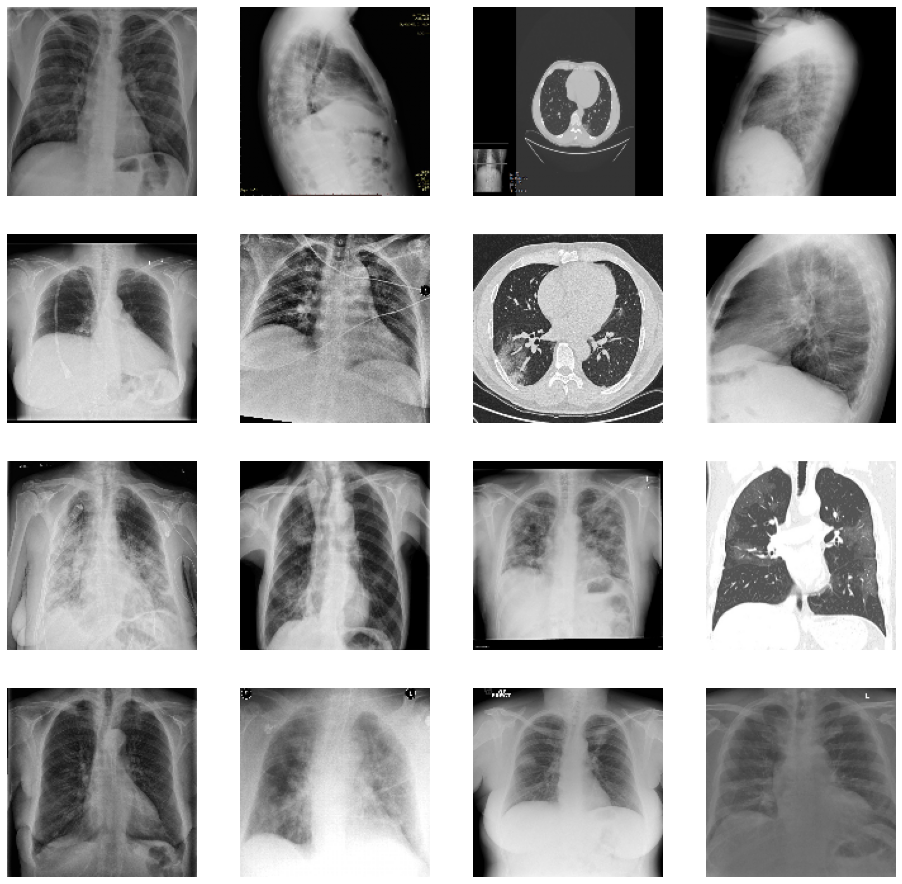

In [13]:
img=xtrain
labels=ytrain
fig, axes = plt.subplots(4, 4, figsize = (16, 8))
fig.set_size_inches(16, 16)
for (image, label, ax) in zip(img, labels, axes.flatten()):
    ax.imshow(image)
    ax.axis('off')

In [14]:
# initialize the model
model = Sequential()
inputShape = (150,150,3)

		# first set of CONV => RELU => POOL layers
model.add(Conv2D(16, (7,7), padding="same",
		input_shape=inputShape))
model.add(Activation("relu"))
model.add(Dropout(0.8))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(3,3)))



		# first (and only) set of FC => RELU layers
model.add(Flatten())
#model.add(Dense(500))
model.add(Activation("relu"))

		# softmax classifier
model.add(Dense(21))
model.add(Activation("softmax"))

In [15]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
stop_early = EarlyStopping(monitor='val_loss', patience=3)

In [16]:
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      2368      
                                                                 
 activation (Activation)     (None, 150, 150, 16)      0         
                                                                 
 dropout (Dropout)           (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 40000)             0         
                                                                 
 activation_1 (Activation)   (None, 40000)             0         
                                                        

In [18]:
H = model.fit(xtrain,ytrain,validation_split=(0.2), 
              steps_per_epoch=len(xtrain) // BS,epochs=EPOCHS, verbose=1,callbacks=[stop_early])

Epoch 1/25
21/21 [==============================] - 9s 425ms/step - loss: 0.2631 - accuracy: 0.4327 - val_loss: 0.1767 - val_accuracy: 0.6000
Epoch 2/25
21/21 [==============================] - 8s 373ms/step - loss: 0.1203 - accuracy: 0.6355 - val_loss: 0.2114 - val_accuracy: 0.6000
Epoch 3/25
21/21 [==============================] - 9s 408ms/step - loss: 0.1168 - accuracy: 0.6355 - val_loss: 0.1881 - val_accuracy: 0.6000
Epoch 4/25
21/21 [==============================] - 9s 419ms/step - loss: 0.1084 - accuracy: 0.6355 - val_loss: 0.1729 - val_accuracy: 0.6000
Epoch 5/25
21/21 [==============================] - 8s 400ms/step - loss: 0.1080 - accuracy: 0.6355 - val_loss: 0.1951 - val_accuracy: 0.6000
Epoch 6/25
21/21 [==============================] - 9s 423ms/step - loss: 0.0986 - accuracy: 0.6355 - val_loss: 0.1903 - val_accuracy: 0.6000
Epoch 7/25
21/21 [==============================] - 9s 409ms/step - loss: 0.0936 - accuracy: 0.6445 - val_loss: 0.1999 - val_accuracy: 0.6000


In [19]:
model.evaluate(xtest,ytest)

8/8 [==============================] - 1s 92ms/step - loss: 0.1980 - accuracy: 0.6180


[0.19798576831817627, 0.6180257797241211]